In [2]:
#Here we quickly run through setting up a standard polar axes.
#We'll also combine this with a demonstration of showing images, and how you can make the most of add_axes 
#Let your imagination roam free with the possibilities of showing figures on top of images to show certain data

#Usual 3 imports you'd need. 
#%matplotlib inline simply makes sure figures are rendered properly in a notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

#We'll also use this specific part of matplotlib for demonstrating how to show images
import matplotlib.image as mpimg

%matplotlib inline

In [3]:
#Image dimensions, so we make a figure the correct size according to the image aspect ratio
pix_x = 454
pix_y = 715

rat_x = pix_x/max(pix_x,pix_y)
rat_y = pix_y/max(pix_x,pix_y)

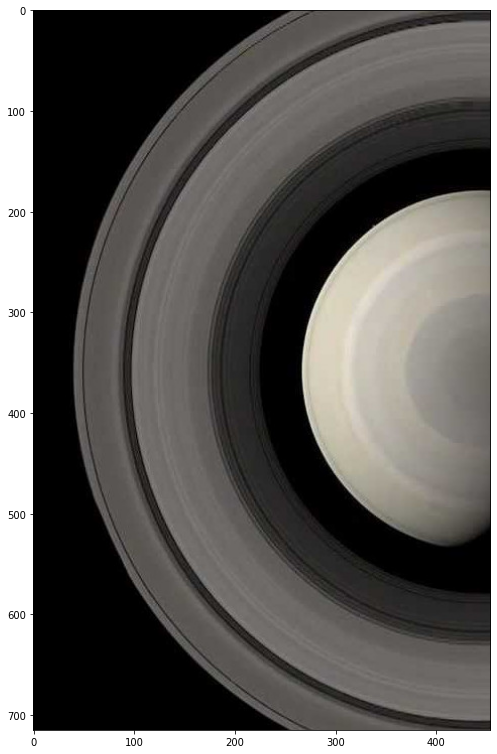

In [4]:
#Setting up figure with generally correct size. 10x10 inches if square image
Fig = plt.figure('Some ring example')
Fig.set_size_inches(10*rat_x, 10*rat_y)
bg_ax = Fig.add_axes([0,0,1,1])

#Imread basically reads in image data and creates a 2D array with colour values
bg_arr = mpimg.imread('goodplanet.jpg')
bg_img = bg_ax.imshow(bg_arr)

#You will notice the figure below has axes labels. We don't actually need to get rid of these though
#The 'figure' window that would be saved from Fig.savefig is only inside the region, so the rest is cut off

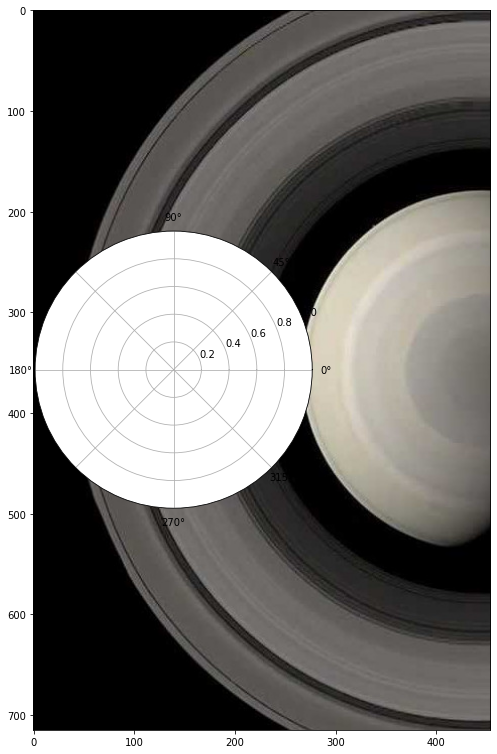

In [5]:
#There is no elegant solution to this, we simply have to use trial and error to fit an axes nicely over an image
axarea = [-0.14,0.3077,0.895,0.385]
ax = Fig.add_axes(axarea, polar=True)
Fig

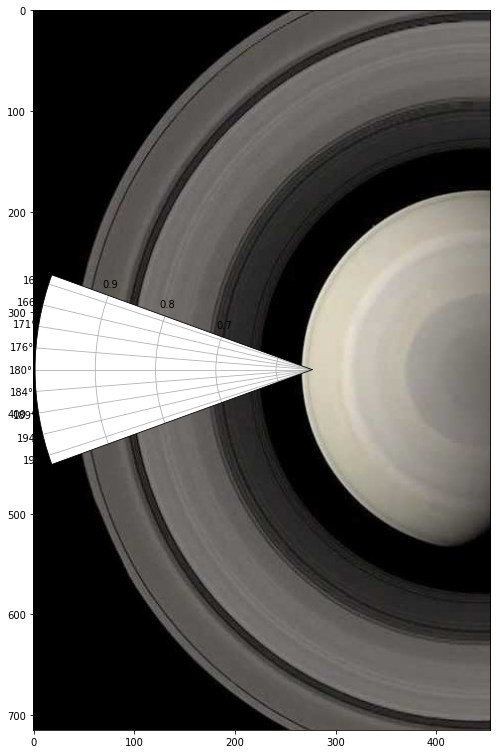

In [6]:
#Setting axes limits for the polar plot. Not however, that now the origin is at r=0.54. We still want it at 0
ax.set_thetamin(160)
ax.set_thetamax(200)
ax.set_rmin(0.54)
ax.set_rmax(1)
Fig

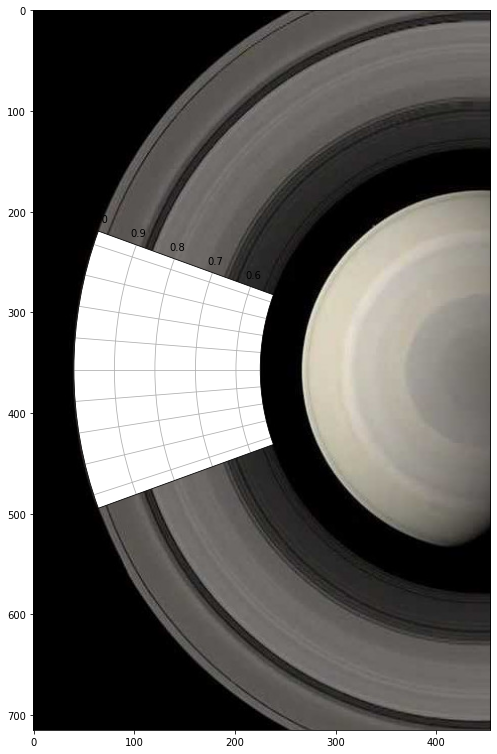

In [7]:
#Now it looks how we want
ax.set_rorigin(0.0)
Fig

In [8]:
def somewavedata(): #Copied and pasted code from stackoverflow to make some 2D data
    f = 100         # frequency
    fs = 100       # sample frequency
    Ts = 1/fs      # sample period
    t = np.arange(0,0.5, Ts)   # time index
    c = 50             # speed of wave
    w = 4*np.pi *f     # angular frequency
    k = w/c            # wave number

    resolution = 0.02
    x = np.arange(-5, 5, resolution)
    y = np.arange(-5, 5, resolution)
    dx = np.array(x); M = len(dx)
    dy = np.array(y); N = len(dy)
    [xx, yy] = np.meshgrid(x, y);
    theta = np.pi / 4         # direction of propagation
    kx =  k* np.cos(theta)
    ky = k * np.sin(theta)
    plane_wave = -np.cos(kx * xx + ky * yy - w * t[1])

    return plane_wave

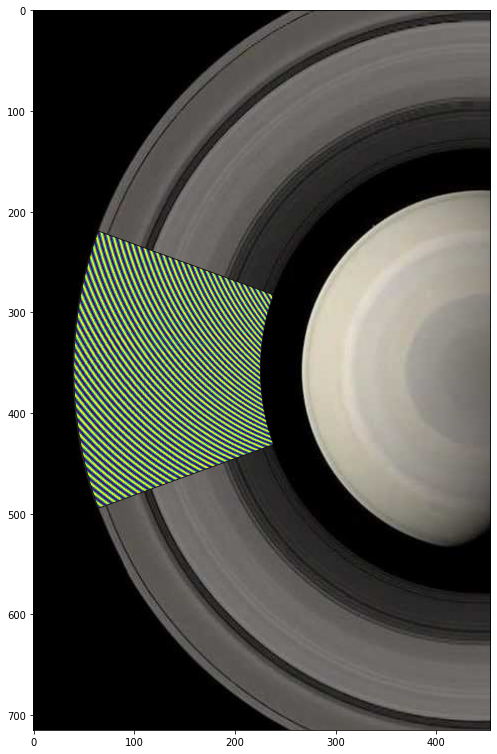

In [9]:
plane_wave = somewavedata()
#We're using pcolormesh here, which asks for x and y ranges (here r and theta) for the 2d data
theta_range = np.radians(np.linspace(160,200,500))
r_range = np.linspace(0.54,1,500)

ax.grid(False) #A bug with pcolormesh so we must do this. You can make grid True again after the function though
ax.pcolormesh(theta_range,r_range,plane_wave)
ax.set_rmin(0.54)
ax.set_rticks([])

Fig

In [10]:
#And just to prove that saving it cuts off the axes labels for the background
Fig.savefig('test.png')